In [1]:
import librosa 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from tqdm import tqdm 
import IPython.display as ipd 
import numpy as np

In [2]:
healthy_consonants_dir = os.listdir(r'C:\Users\Yixiu\OneDrive - Singapore University of Technology and Design\UROP\UROP Python audio classification\healthy\consonants')

dementia_consonants_dir = os.listdir(r'C:\Users\Yixiu\OneDrive - Singapore University of Technology and Design\UROP\UROP Python audio classification\dementia\consonants')

In [3]:
dementia_consonants = []
healthy_consonants = []

for file in dementia_consonants_dir:
    dementia_consonants.append(file)
    
for file in healthy_consonants_dir:
    healthy_consonants.append(file)

In [4]:
print(dementia_consonants[0:12])
print(healthy_consonants[0:12])

['[b]_D01013_6_7_1.wav', '[b]_D01013_6_7_2.wav', '[b]_D01013_6_7_3.wav', '[b]_D01015_10_7_1.wav', '[b]_D01015_10_7_2.wav', '[b]_D01015_10_7_3.wav', '[b]_D01015_10_7_4.wav', '[b]_D01015_17_1_1.wav', '[b]_D01015_17_1_2.wav', '[b]_D01015_17_1_3.wav', '[b]_D01015_9_5_1.mp3', '[b]_D01015_9_5_2.mp3']
['ch_H01021_11_8_1.wav', 'ch_H01021_11_8_2.wav', 'c_H01021_11_8_1.wav', 'd_H01021_11_8_1.wav', 'd_H01021_11_8_2.wav', 'd_H01021_11_8_3.wav', 'f_H01021_11_8_1.wav', 'g_H01021_11_8_1.wav', 'g_H01021_11_8_2.wav', 'g_H01021_11_8_3.wav', 'g_H01021_11_8_4.wav', 'g_H01021_11_8_5.wav']


### Healthy elderlies

In [5]:
interested_feature_healthy_file_list = []
interested_phoneme = "l"

for file in healthy_consonants:
    if interested_phoneme in file[0:3]: 
        interested_feature_healthy_file_list.append(file)

print(interested_feature_healthy_file_list)
type(interested_feature_healthy_file_list[0])

['[l]_H01001_22_2_1.wav', '[l]_H01001_22_2_2.wav', '[l]_H01007_16_5_1.mp3', '[l]_H01007_16_5_2.mp3', '[l]_H01007_16_5_3.mp3', '[l]_H01027_18_3_1.mp3', '[l]_H02007_6_7_1_lin.wav', '[l]_H02007_6_7_2_lin.wav', '[l]_H02007_6_7_3_lin.wav', '[l]_H02007_6_7_4_lin.wav', '[l]_H02007_6_7_5_lin.wav', '[l]_H02007_6_7_6_lin.wav', '[l]_H02007_6_7_7_lin.wav', '[l]_H02007_6_7_8_lin.wav', '[l]_H02051_20_5_1.wav', '[l]_H02051_20_5_2.wav', '[l]_H02051_20_5_3.wav', '[l]_H02051_20_5_4.wav']


str

In [6]:
# Read one of the 'l' phoneme files from a healthy elderly.

os.chdir(r'C:\Users\Yixiu\OneDrive - Singapore University of Technology and Design\UROP\UROP Python audio classification\healthy\consonants')

ipd.Audio(interested_feature_healthy_file_list[0], rate=48000)

[array([[-1.91992676e+02, -1.88198929e+02, -1.84929474e+02,
        -1.84181046e+02, -1.80815918e+02, -1.74098663e+02,
        -1.71556442e+02, -1.71605591e+02, -1.70975845e+02,
        -1.60707153e+02, -1.42153259e+02],
       [ 1.07296722e+02,  1.15173187e+02,  1.17389748e+02,
         1.13814171e+02,  1.09460678e+02,  1.14307129e+02,
         1.13140244e+02,  1.06037964e+02,  1.06583588e+02,
         9.54636688e+01,  8.60493622e+01],
       [ 5.02703667e+00, -1.06977234e+01, -1.54138603e+01,
        -1.67695351e+01, -1.70549088e+01, -1.54913960e+01,
        -1.98520756e+01, -1.91895638e+01, -2.01242485e+01,
        -9.69583893e+00,  5.70529318e+00],
       [ 2.22657986e+01,  3.10700951e+01,  3.57732315e+01,
         3.76302071e+01,  4.21245804e+01,  4.11449013e+01,
         4.15211792e+01,  4.07098236e+01,  3.91683731e+01,
         2.91195660e+01,  8.08383369e+00],
       [ 6.24917269e-01, -7.24578333e+00, -1.88548374e+01,
        -2.23469887e+01, -2.40588684e+01, -2.65372295e+01,
 

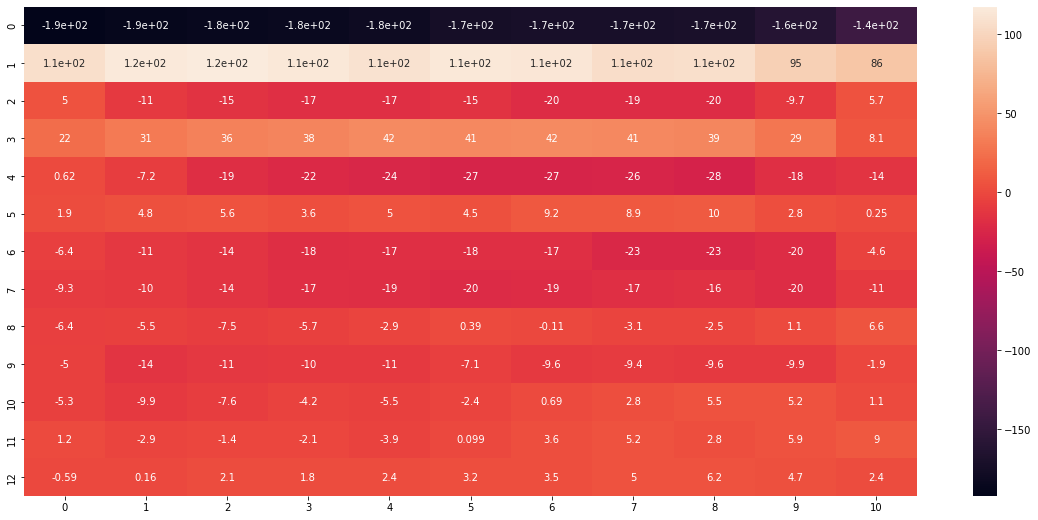

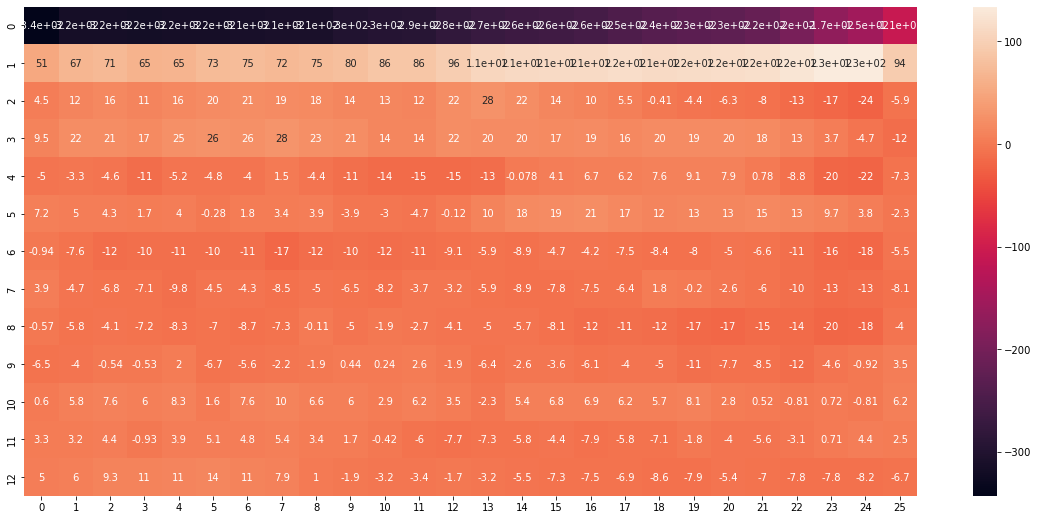

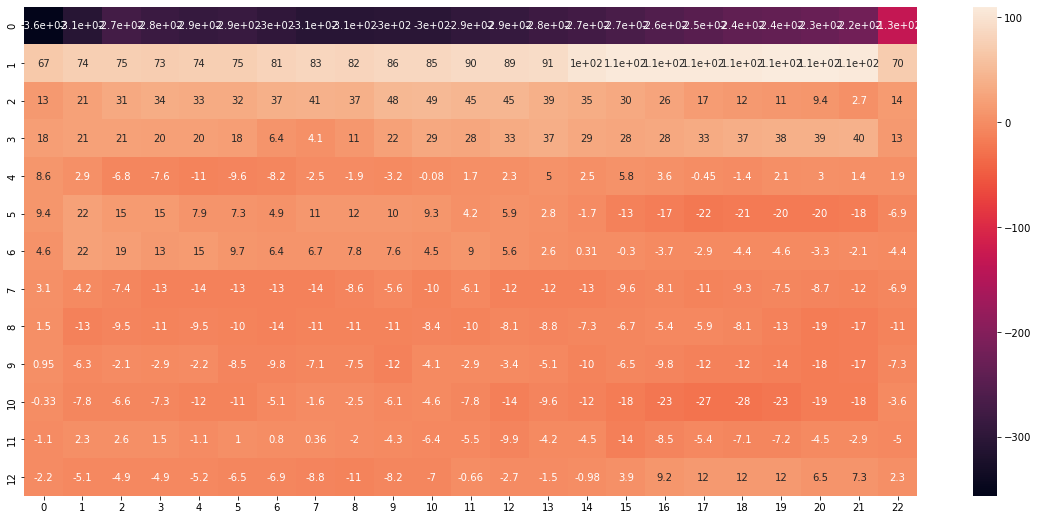

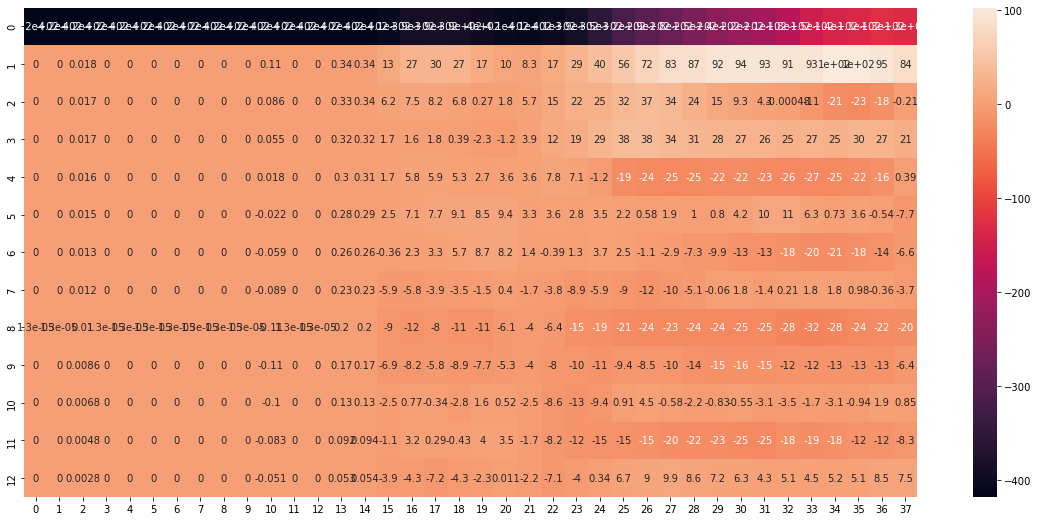

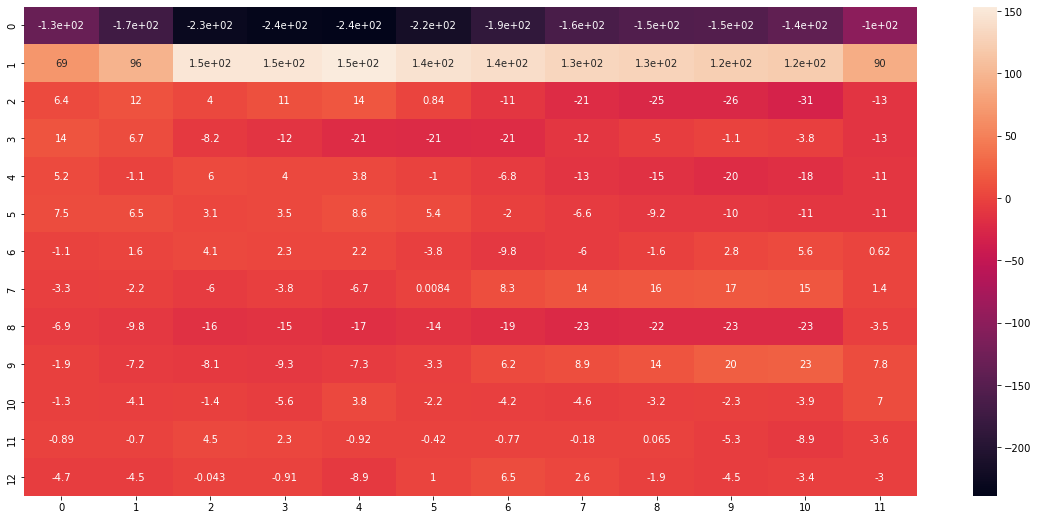

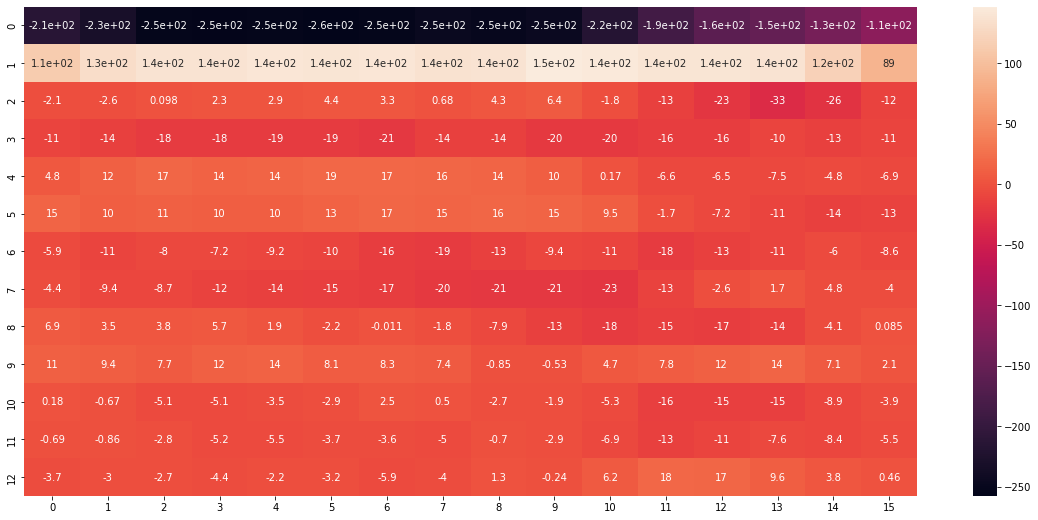

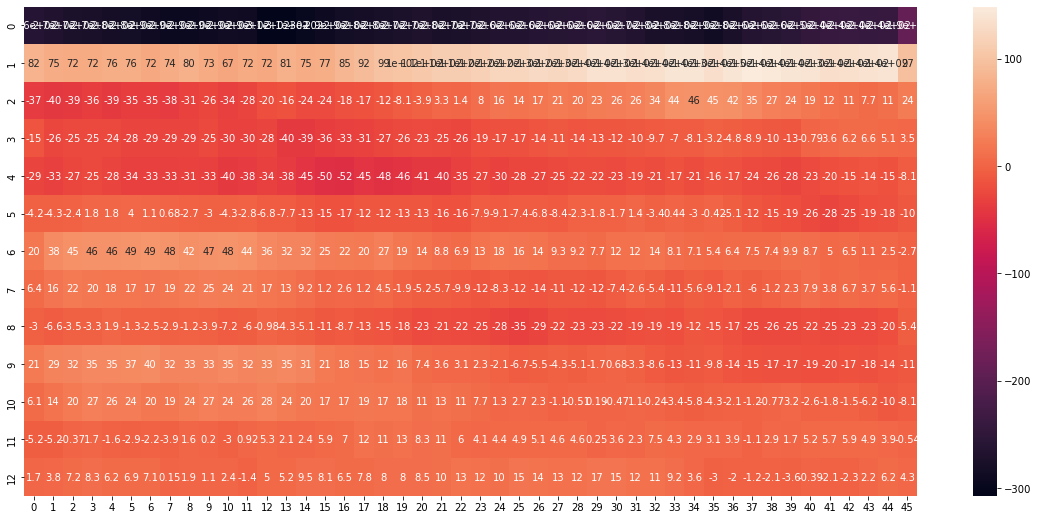

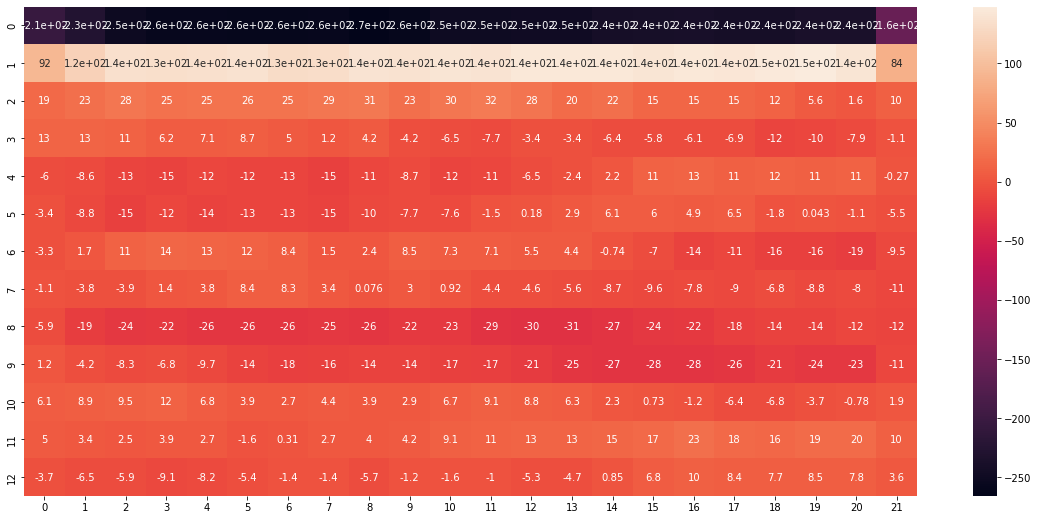

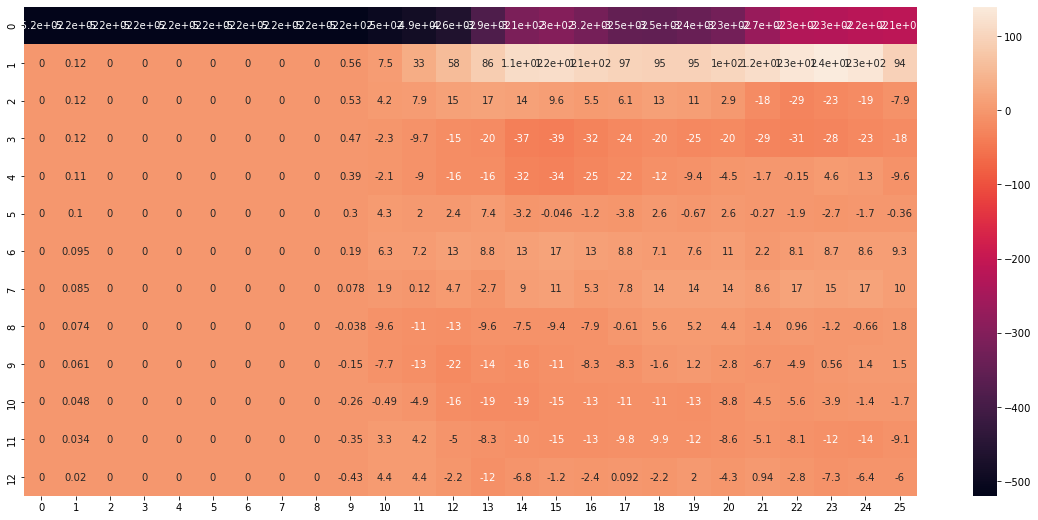

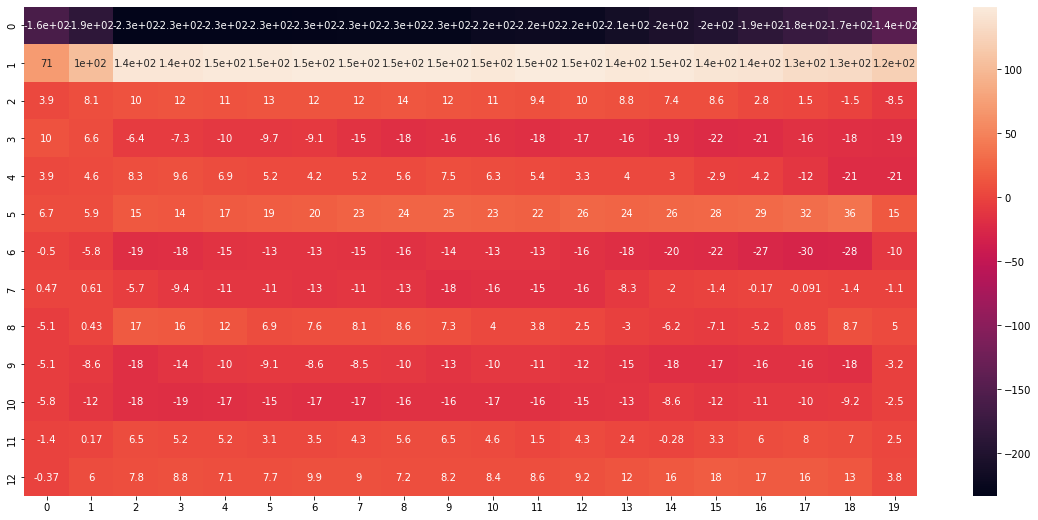

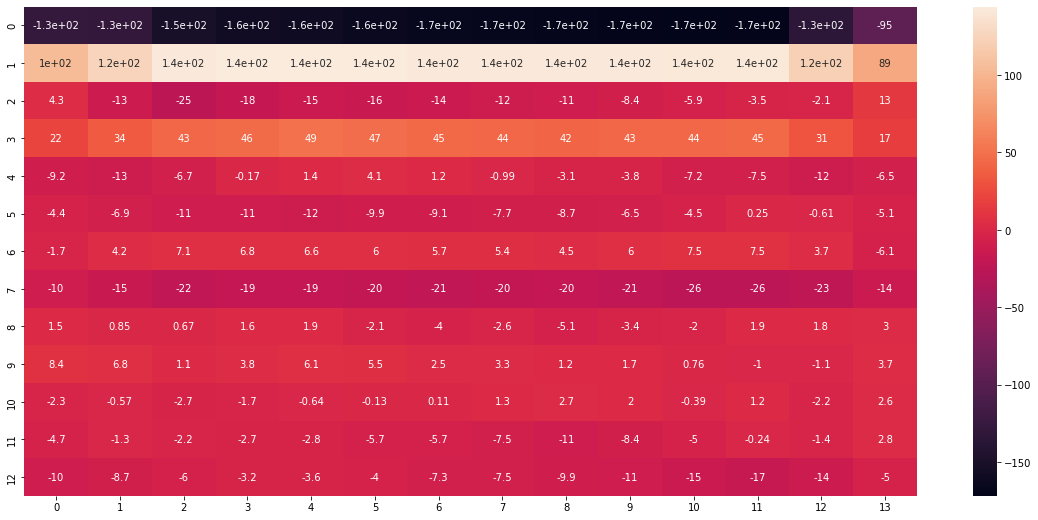

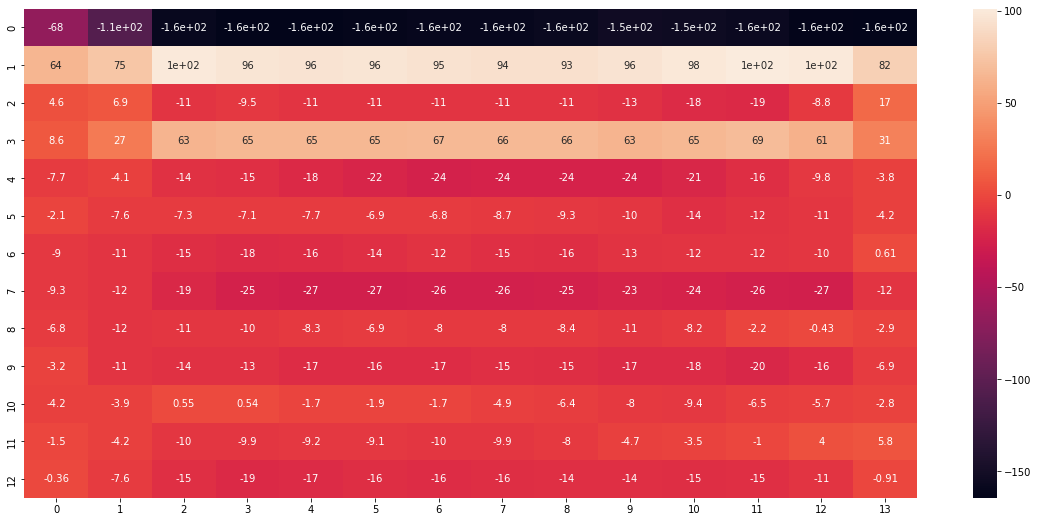

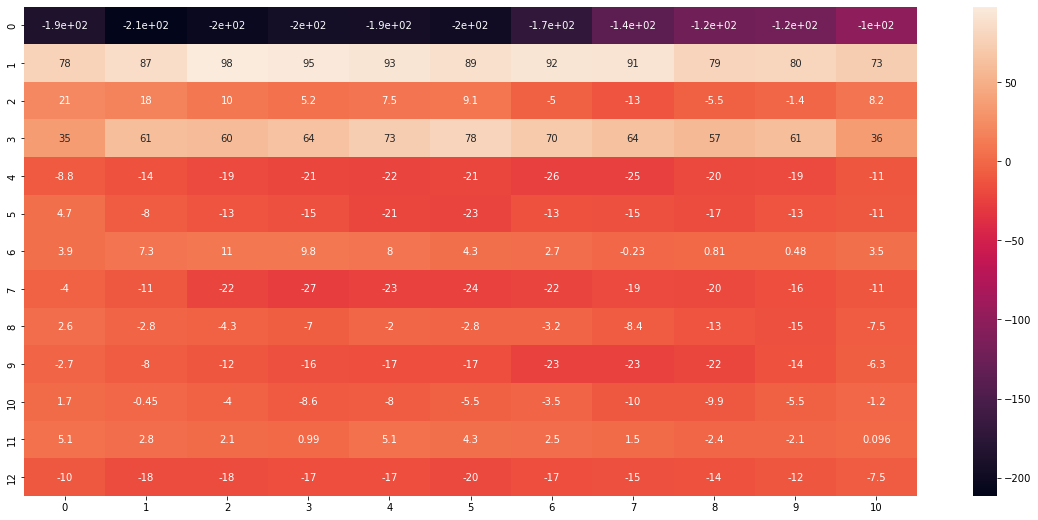

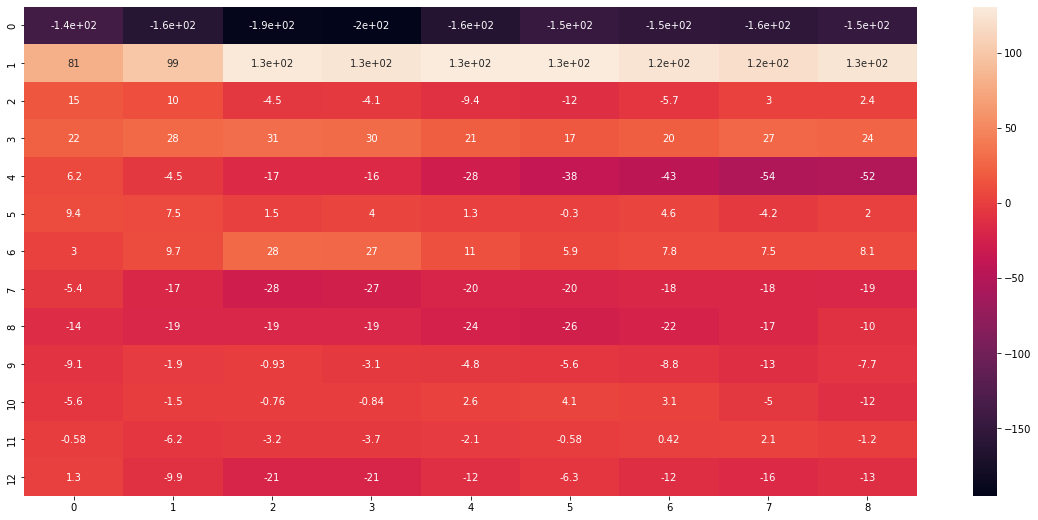

In [7]:
os.chdir(r'C:\Users\Yixiu\OneDrive - Singapore University of Technology and Design\UROP\UROP Python audio classification\healthy\consonants')

mfcc_healthy_l_list = []

for i in range(len(interested_feature_healthy_file_list)):
    if '.wav' in interested_feature_healthy_file_list[i]:

        y, sr = librosa.load(interested_feature_healthy_file_list[i]) 

        n_mfcc = 13
        n_mels = 40
        n_fft = 512 
        hop_length = 160
        fmin = 0
        fmax = None
        
        
        # Get the MFCCs of healthy 'l' audio file (note that there are 13 MFCCs in each audio file and each MFCC is an array)
        mfcc_healthy_l_i = librosa.feature.mfcc(y=y, sr=sr, n_fft=n_fft,
                                        n_mfcc=n_mfcc, n_mels=n_mels,
                                        hop_length=hop_length,
                                        fmin=fmin, fmax=fmax, htk=False)
        # Plot the intensity of the 13 MFCCs in each audio file in a heatmap; each heatmap represents one audio file
        fig, ax = plt.subplots(figsize=(20,9))
        sns.heatmap(mfcc_healthy_l_i, annot = True)
    
        mfcc_healthy_l_list.append(mfcc_healthy_l_i)
    
    

print(mfcc_healthy_l_list)

In [8]:
print(f'There are {len(mfcc_healthy_l_list)} audio files')

There are 14 audio files


[[-1.74655914e+02  1.07701492e+02 -1.21415291e+01  3.35101433e+01
  -1.91448498e+01  5.16869307e+00 -1.56323242e+01 -1.56631250e+01
  -2.33515382e+00 -8.92817307e+00 -1.77910769e+00  1.58949697e+00
   2.79604125e+00]
 [-2.63923981e+02  9.48825531e+01  7.65265131e+00  1.67197933e+01
  -4.77523756e+00  6.93988085e+00 -9.39710903e+00 -6.01244164e+00
  -8.47643089e+00 -3.58044672e+00  4.55514574e+00 -9.65693235e-01
  -9.22737181e-01]
 [-2.73373779e+02  8.93035431e+01  2.88030472e+01  2.49676456e+01
  -5.29847622e-01 -1.19678624e-01  4.68280745e+00 -9.37047195e+00
  -9.86287022e+00 -7.85532951e+00 -1.16534176e+01 -3.69938421e+00
  -4.57028568e-01]
 [-3.38768341e+02  3.59022255e+01  4.78834677e+00  1.16347256e+01
  -6.11742115e+00  2.42286754e+00 -2.83499646e+00 -1.97789156e+00
  -1.10894861e+01 -6.15407896e+00 -1.16074455e+00 -6.81740999e+00
   1.39804173e+00]
 [-1.77402817e+02  1.24502708e+02 -6.54692459e+00 -8.10019970e+00
  -5.62176275e+00 -1.29831386e+00 -2.73591191e-01  4.09050798e+00


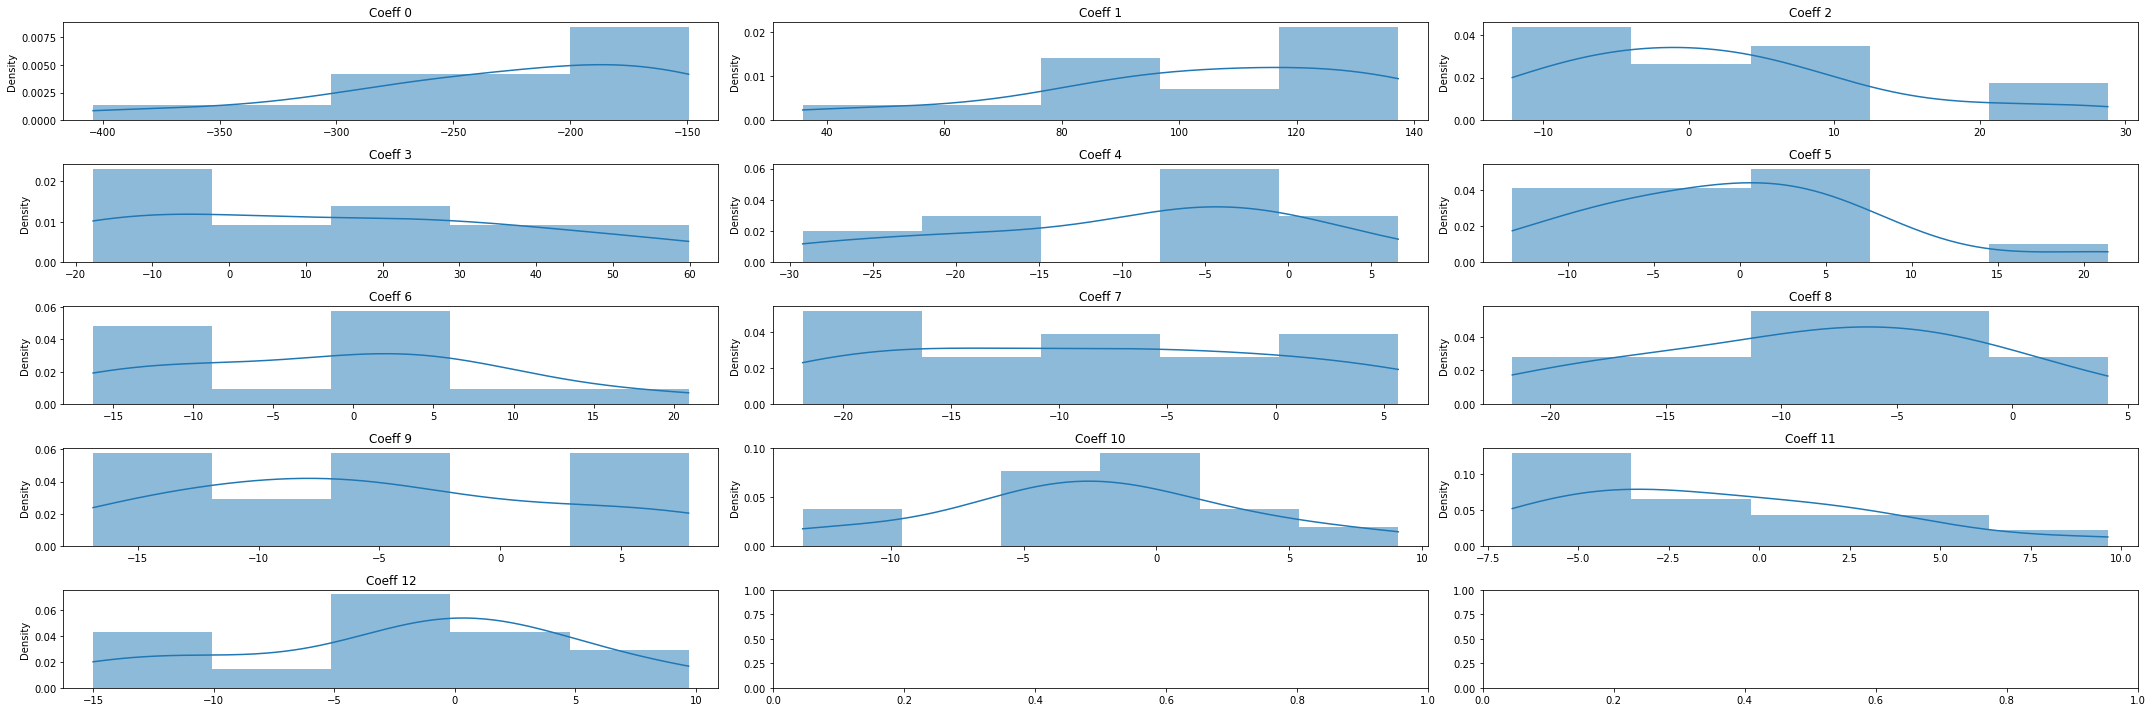

In [9]:
# This following code plots a bar chart for the mean spectrum of each of the 13 MFCCs across all the 'l' phoneme files 
# from healthy elderlies.

os.chdir(r'C:\Users\Yixiu\OneDrive - Singapore University of Technology and Design\UROP\UROP Python audio classification\healthy\consonants')

mean_mfcc_list_healthy = np.array([track.mean(axis=1) for track in mfcc_healthy_l_list]) # We get the average energy of the coeffs in each file
fig,axes = plt.subplots(5,3,figsize=(30,10))

print(mean_mfcc_list_healthy)



for i in range(mean_mfcc_list_healthy.shape[1]):
    sns.histplot(mean_mfcc_list_healthy.T[i],ax=axes.ravel()[i], kde=True, stat="density", linewidth=0)
    axes.ravel()[i].set_title("Coeff "+str(i))
    plt.tight_layout()

### Dementia elderlies

In [10]:
interested_feature_dementia_file_list = []
interested_phoneme = "l"

for file in dementia_consonants:
    if interested_phoneme in file[0:3]: 
        interested_feature_dementia_file_list.append(file)

print(interested_feature_dementia_file_list)
type(interested_feature_dementia_file_list[0])

['[l]_D01013_6_7_1.wav', '[l]_D01013_6_7_2.wav', '[l]_D01013_6_7_3.wav', '[l]_D01013_6_7_4.wav', '[l]_D01013_6_7_5.wav', '[l]_D01015_10_7_1.wav', '[l]_D01015_10_7_2.wav', '[l]_D01015_10_7_3.wav', '[l]_D01015_17_1_2.wav', '[l]_D01015_17_1_3.wav', '[l]_D01015_9_5_1.mp3', '[l]_D01015_9_5_2.mp3', '[l]_D01015_9_5_3.mp3', '[l]_D01015_9_5_4.mp3', '[l]_D01015_9_5_5.mp3', '[l]_D02001_8_8_1.wav', '[l]_D02001_8_8_2.wav', '[l]_D02002_19_6_1.wav', '[l]_D02002_19_6_2.wav', '[l]_D02003_2_4_1.wav', '[l]_D02003_2_4_2.wav', '[l]_D02003_2_4_3.wav', '[l]_D02003_2_4_4.wav', '[l]_D02003_4_8_1.wav', '[l]_D02004_15_7_1.wav', '[l]_D02004_15_7_2.wav', '[l]_D02004_15_7_3.wav', '[l]_D02004_15_7_4.wav', '[l]_D02005_9_1_1.wav']


str

In [11]:
# Read one of the 'l' phoneme files from a dementia elderly.
os.chdir(r'C:\Users\Yixiu\OneDrive - Singapore University of Technology and Design\UROP\UROP Python audio classification\dementia\consonants')

ipd.Audio(interested_feature_dementia_file_list[0], rate=48000)

C:\Users\Yixiu\AppData\Local\Temp/ipykernel_30564/679239197.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20,9))


[array([[-1.43994278e+02, -1.93999466e+02, -2.87300079e+02,
        -2.86639038e+02, -2.88651428e+02, -2.91681549e+02,
        -2.91167938e+02, -2.81140961e+02, -2.75032593e+02,
        -2.69443817e+02, -2.66187927e+02, -2.62128662e+02,
        -2.56981201e+02, -2.45477844e+02, -2.32900513e+02,
        -2.20495819e+02, -2.15836853e+02, -2.12879227e+02,
        -2.11342972e+02, -2.09384155e+02, -2.10953339e+02,
        -2.19682755e+02, -2.09685486e+02, -2.05761459e+02,
        -2.09488144e+02, -2.00944168e+02, -1.99414902e+02,
        -2.06491196e+02, -1.39904694e+02],
       [ 7.18138885e+01,  9.02365875e+01,  1.18788429e+02,
         1.14988304e+02,  1.15366608e+02,  1.19089149e+02,
         1.15495552e+02,  1.17687744e+02,  1.17860268e+02,
         1.17447517e+02,  1.19704514e+02,  1.21037254e+02,
         1.28693649e+02,  1.41159439e+02,  1.49275085e+02,
         1.51891403e+02,  1.49902039e+02,  1.54045624e+02,
         1.57177063e+02,  1.61027283e+02,  1.58257416e+02,
         1.4

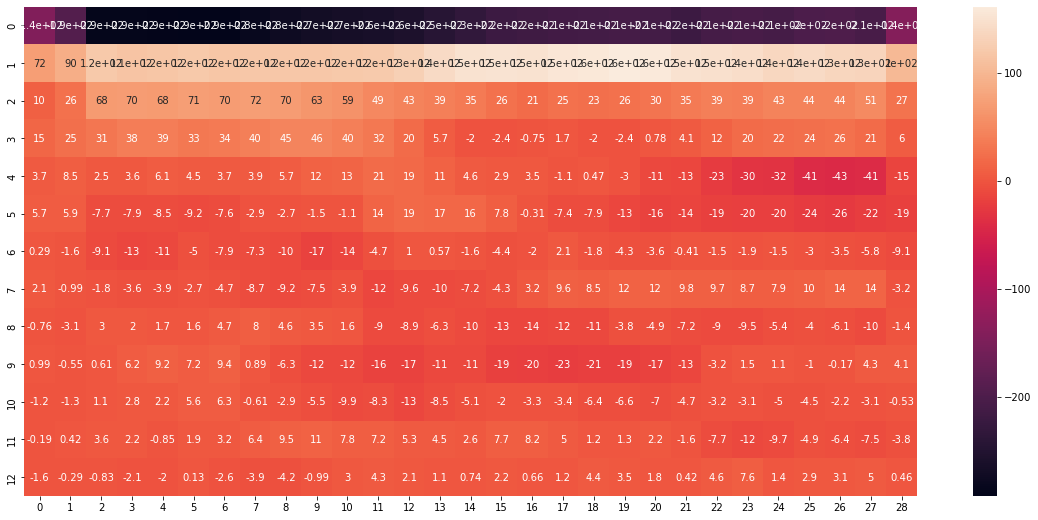

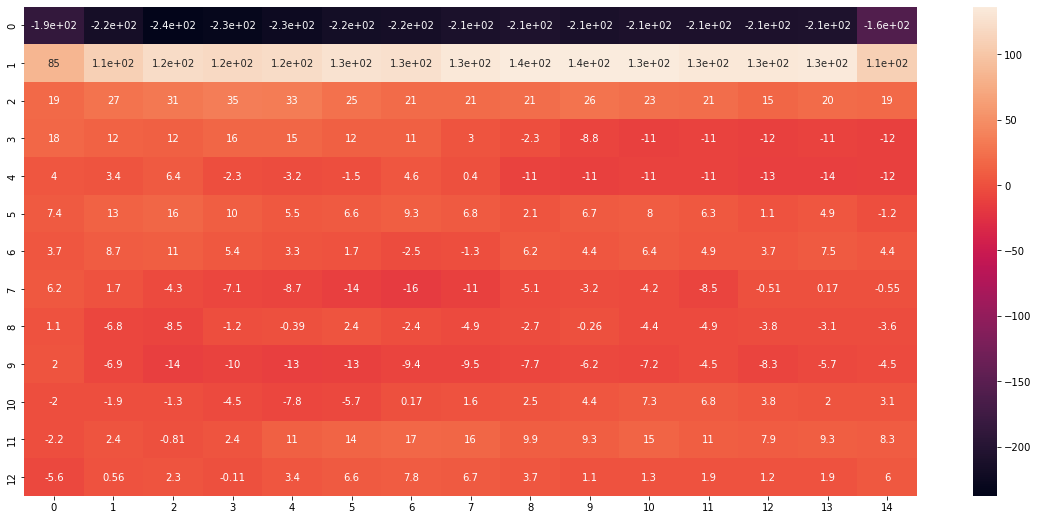

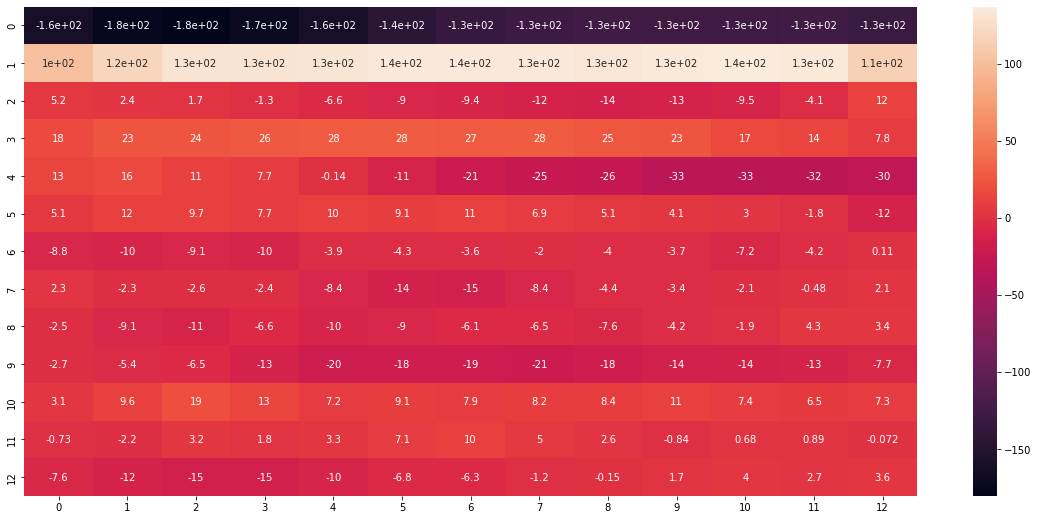

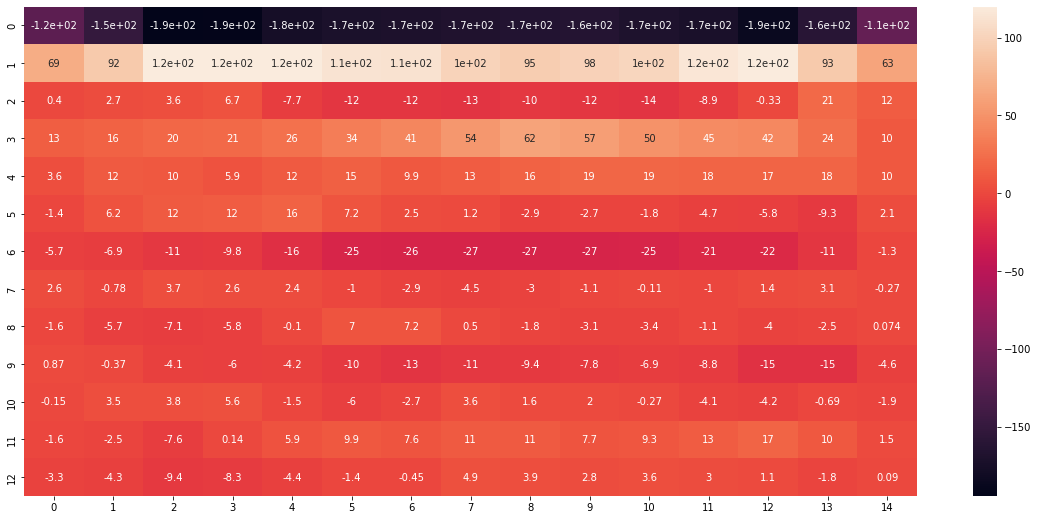

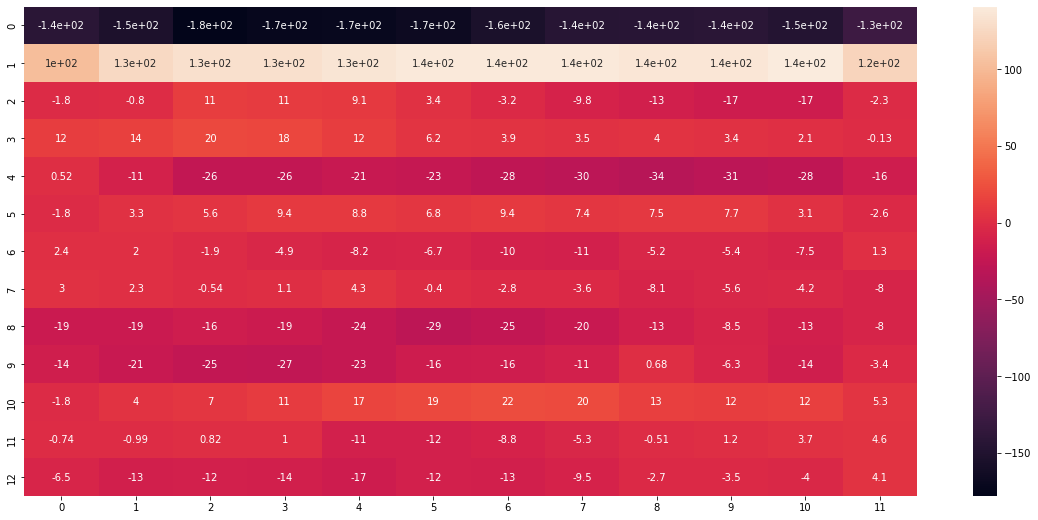

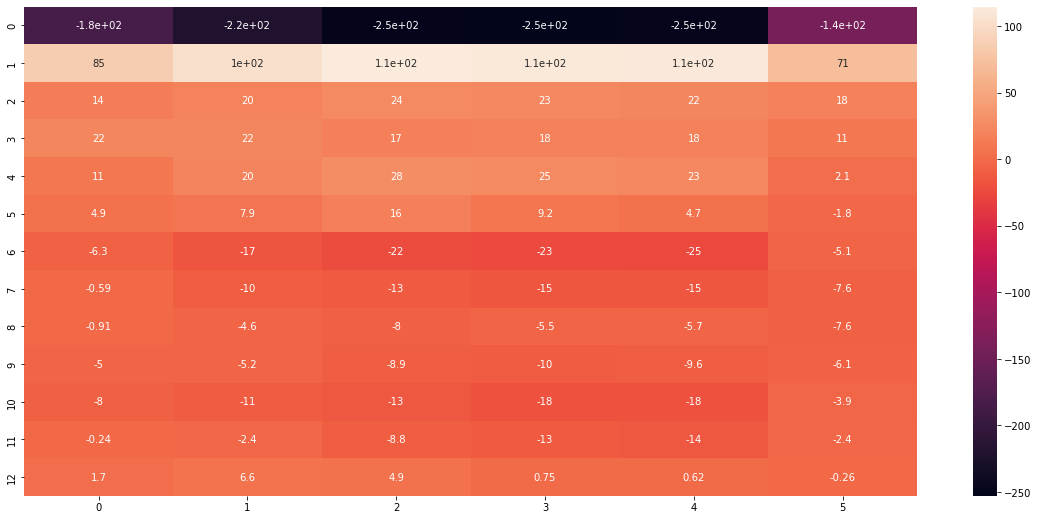

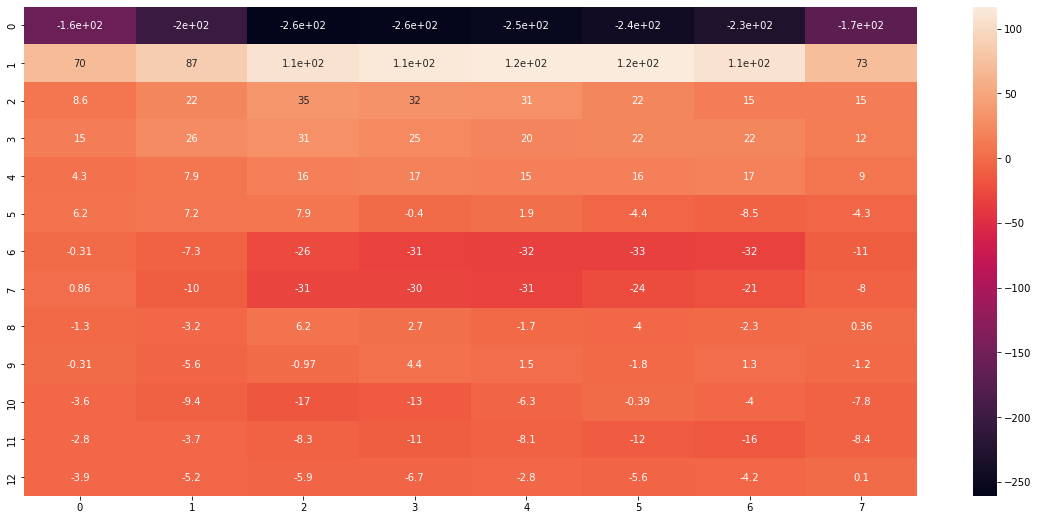

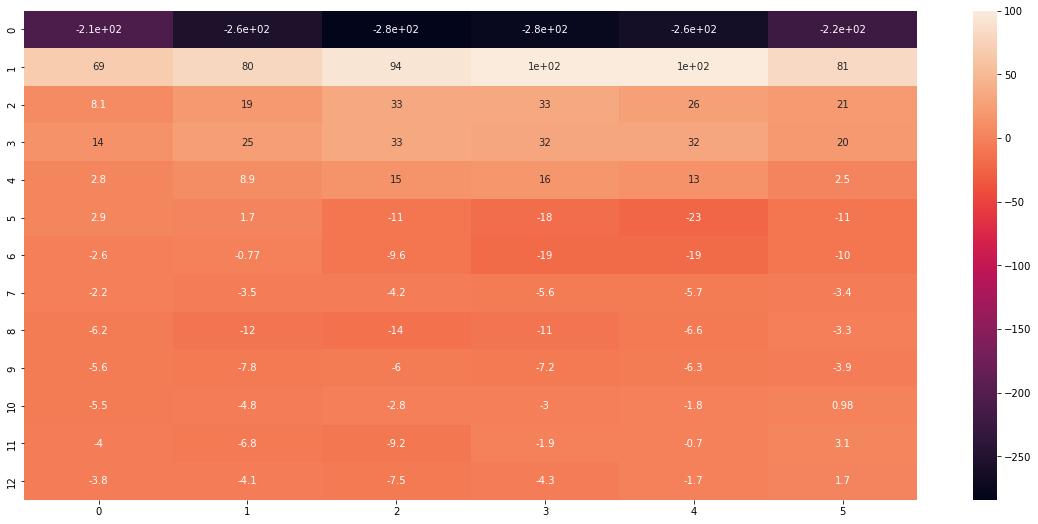

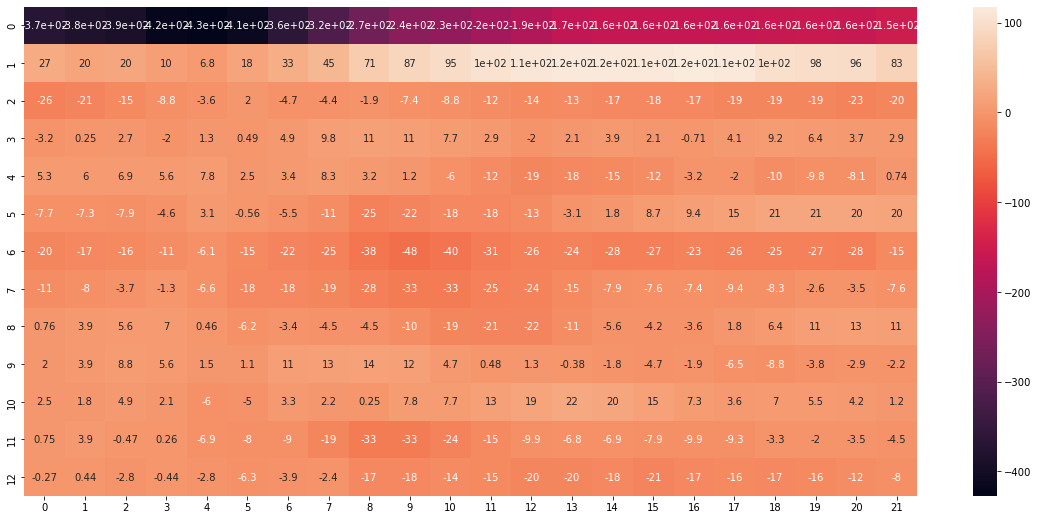

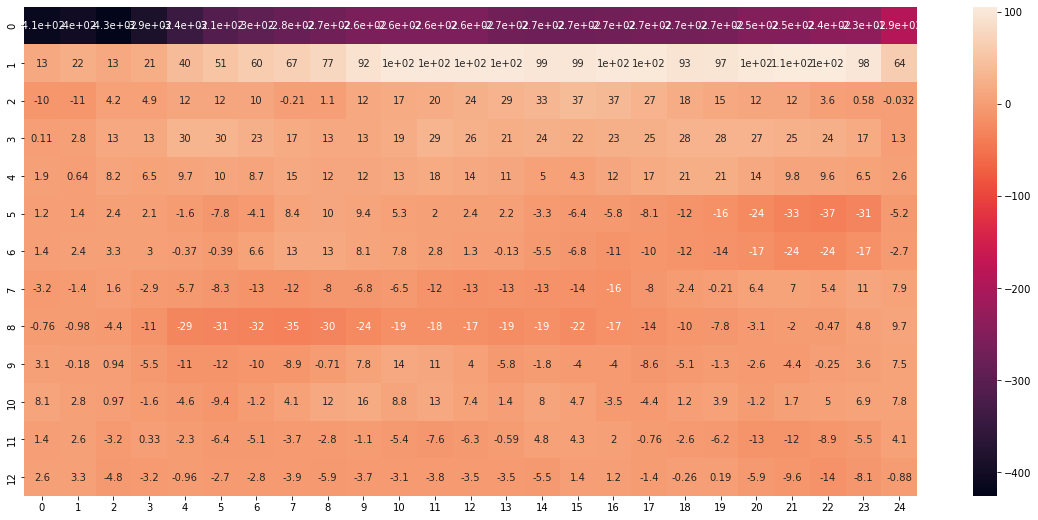

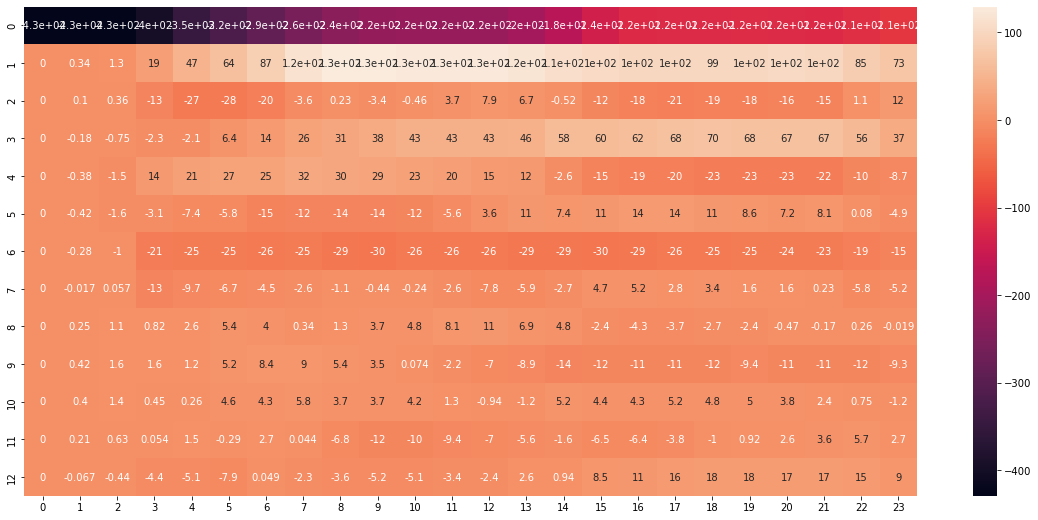

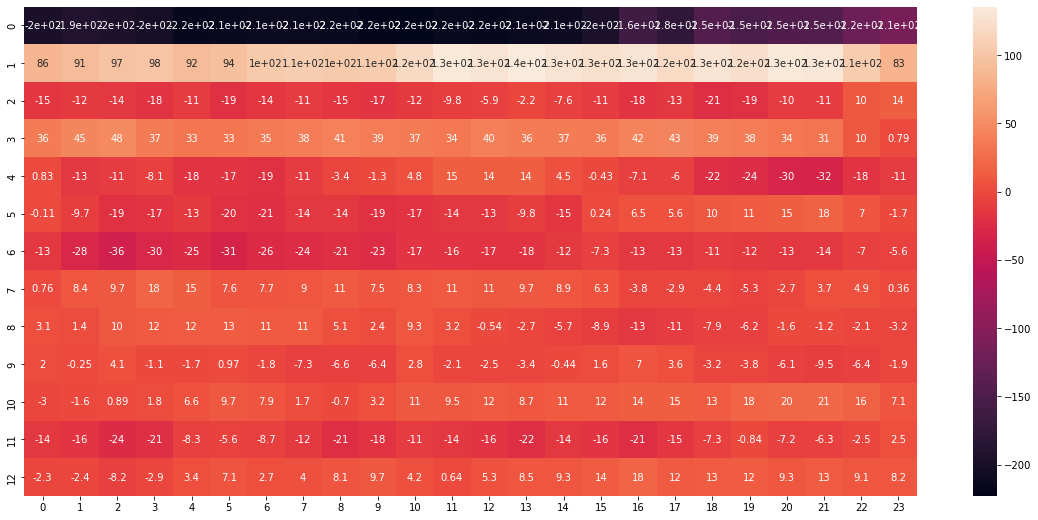

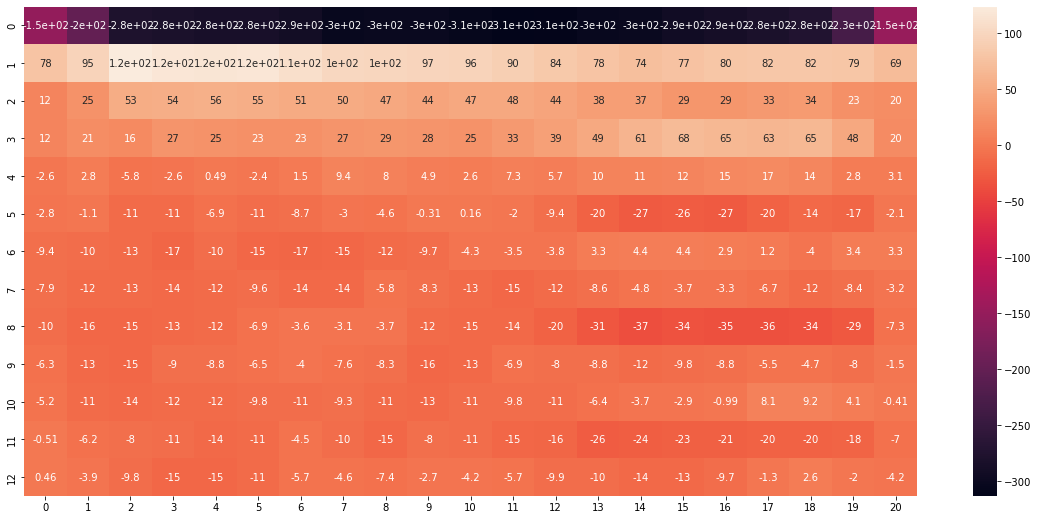

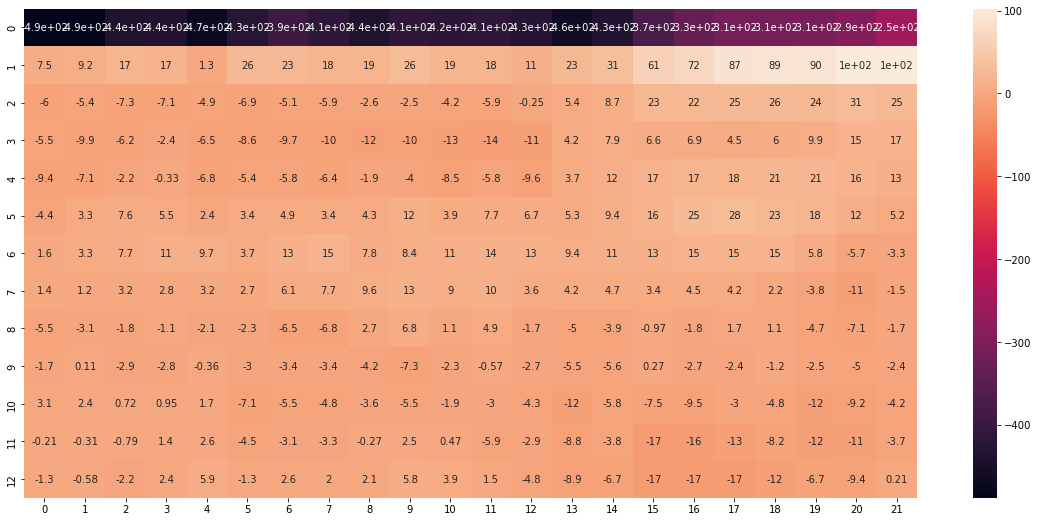

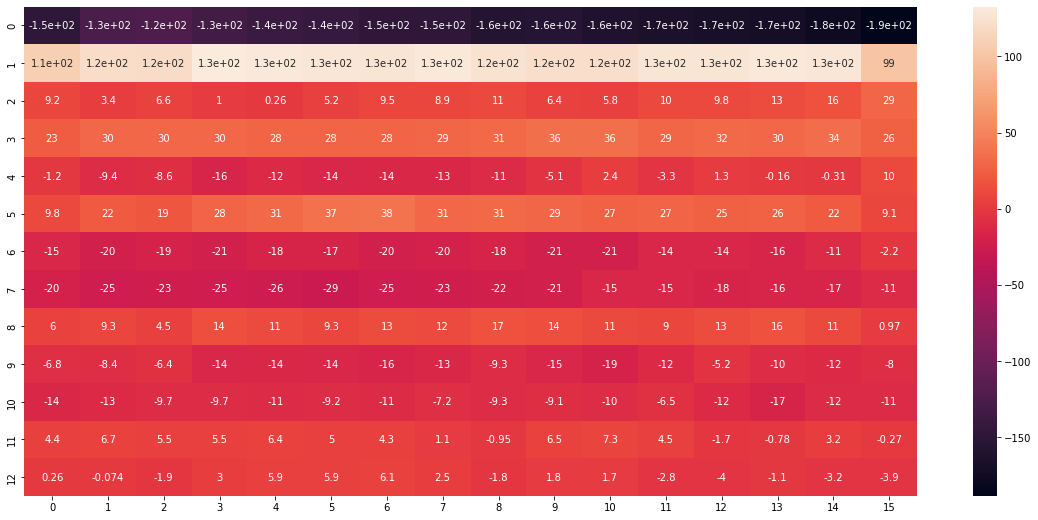

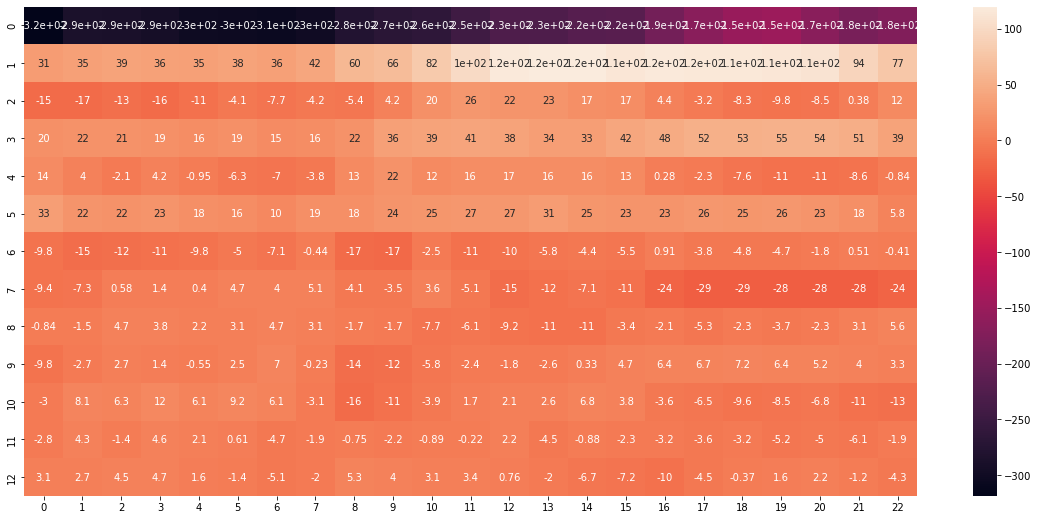

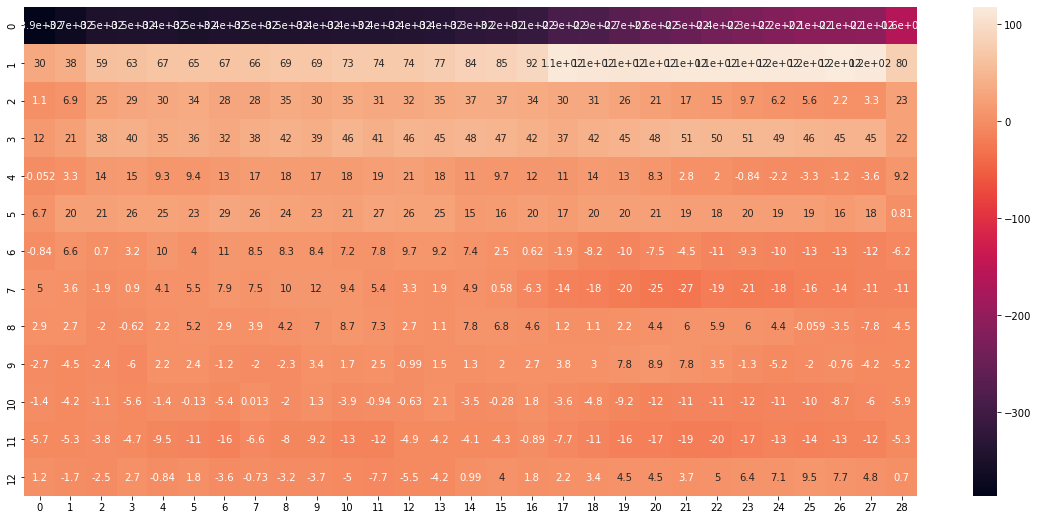

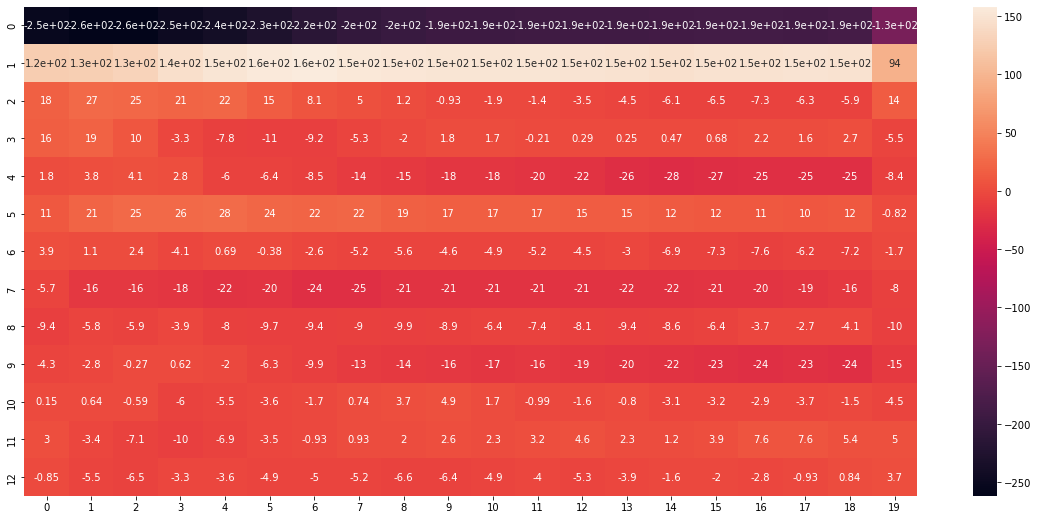

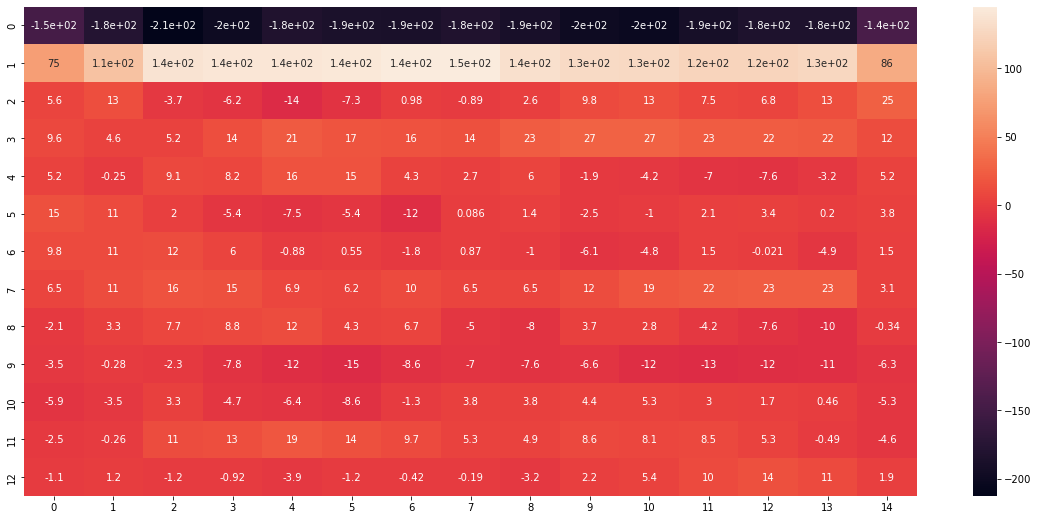

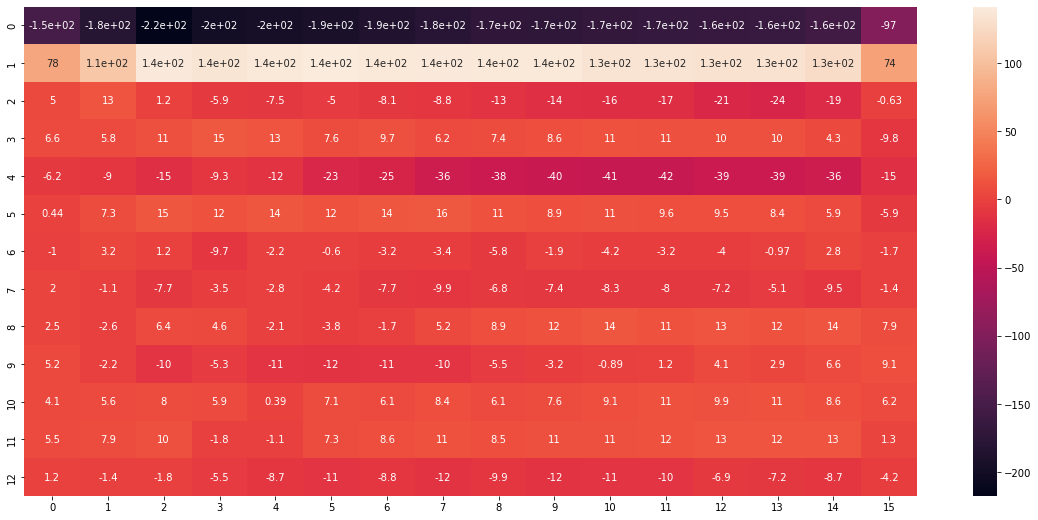

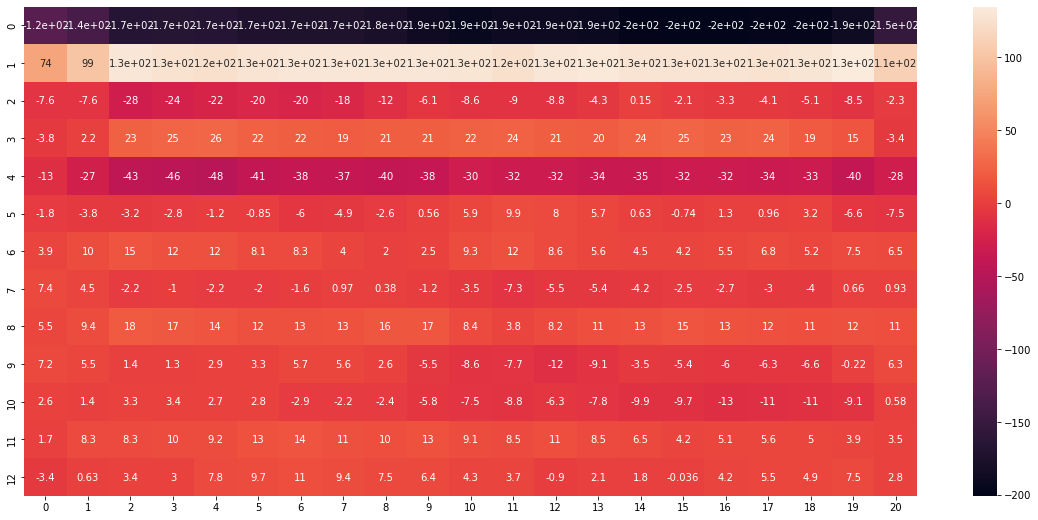

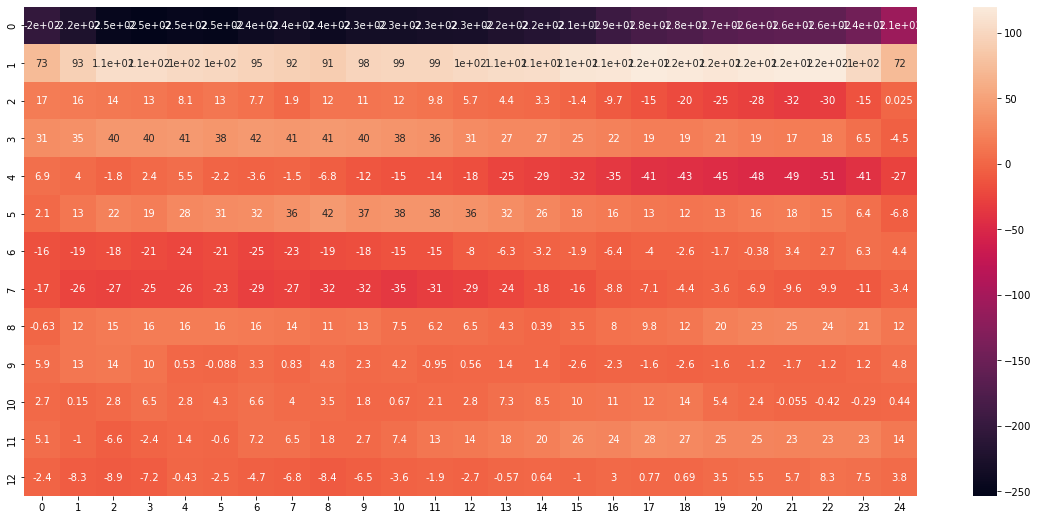

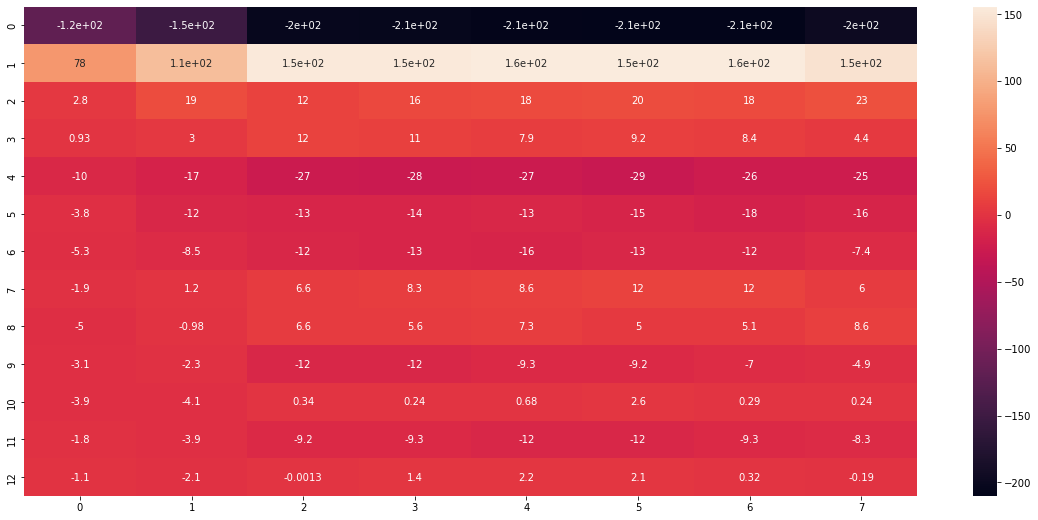

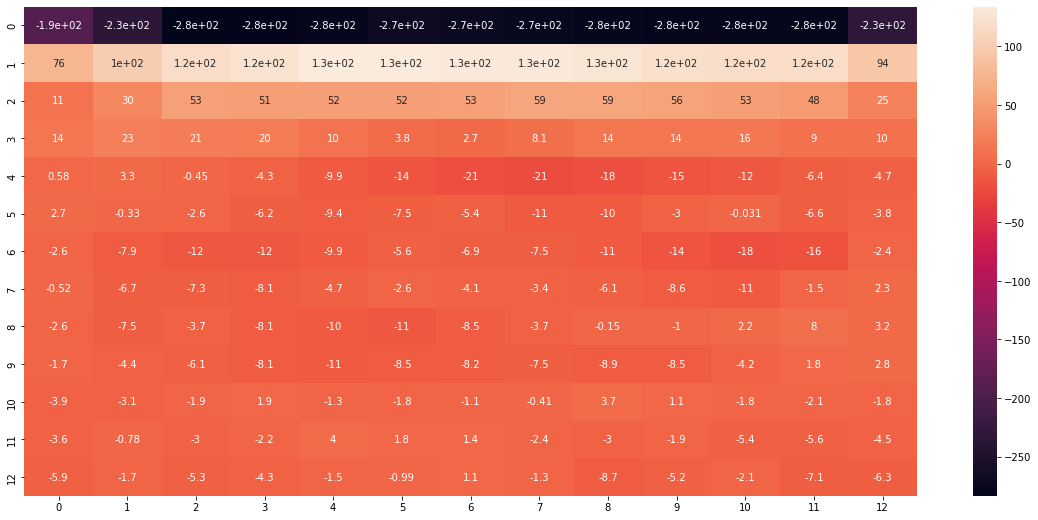

In [12]:
os.chdir(r'C:\Users\Yixiu\OneDrive - Singapore University of Technology and Design\UROP\UROP Python audio classification\dementia\consonants')

mfcc_dementia_l_list = []

for i in range(len(interested_feature_dementia_file_list)):
    if '.wav' in interested_feature_dementia_file_list[i]:

        y, sr = librosa.load(interested_feature_dementia_file_list[i]) 

        n_mfcc = 13
        n_mels = 40
        n_fft = 512 
        hop_length = 160
        fmin = 0
        fmax = None
        
        
        # Get the MFCCs of dementia 'l' audio file (note that there are 13 MFCCs in each audio file)
        mfcc_dementia_l_i = librosa.feature.mfcc(y=y, sr=sr, n_fft=n_fft,
                                        n_mfcc=n_mfcc, n_mels=n_mels,
                                        hop_length=hop_length,
                                        fmin=fmin, fmax=fmax, htk=False)
        # Plot the intensity of each of the 13 MFCCs in that audio file in a heatmap
        fig, ax = plt.subplots(figsize=(20,9))
        sns.heatmap(mfcc_dementia_l_i, annot = True)
    
        mfcc_dementia_l_list.append(mfcc_dementia_l_i)

print(mfcc_dementia_l_list)

In [13]:
print(f'There are {len(mfcc_dementia_l_list)} audio files')

There are 24 audio files


[[-2.32585968e+02  1.30386688e+02  4.44467659e+01  1.97715206e+01
  -4.23775911e+00 -5.87252998e+00 -4.83216381e+00  9.39844012e-01
  -4.10008574e+00 -6.09581280e+00 -3.20306396e+00  1.26645517e+00
   1.11097002e+00]
 [-2.10440582e+02  1.23672760e+02  2.37545433e+01  2.09659100e+00
  -4.77130938e+00  6.84768200e+00  4.45298958e+00 -5.00549030e+00
  -2.90349460e+00 -7.84811878e+00  5.68849981e-01  8.65921211e+00
   2.58927846e+00]
 [-1.45816635e+02  1.28309189e+02 -4.33873272e+00  2.21641273e+01
  -1.25825481e+01  5.33510160e+00 -5.48525476e+00 -4.47879124e+00
  -5.14923573e+00 -1.31695118e+01  9.06614780e+00  2.35929513e+00
  -4.81613541e+00]
 [-1.65053986e+02  1.02051376e+02 -2.93194532e+00  3.43403168e+01
   1.31741228e+01  2.01430416e+00 -1.75781212e+01  6.79498166e-02
  -1.42613435e+00 -7.74718904e+00 -9.57740843e-02  6.12534809e+00
  -9.20529187e-01]
 [-1.53583572e+02  1.31452225e+02 -2.49335408e+00  8.31044006e+00
  -2.28199749e+01  5.38683462e+00 -4.62136602e+00 -1.88091338e+00


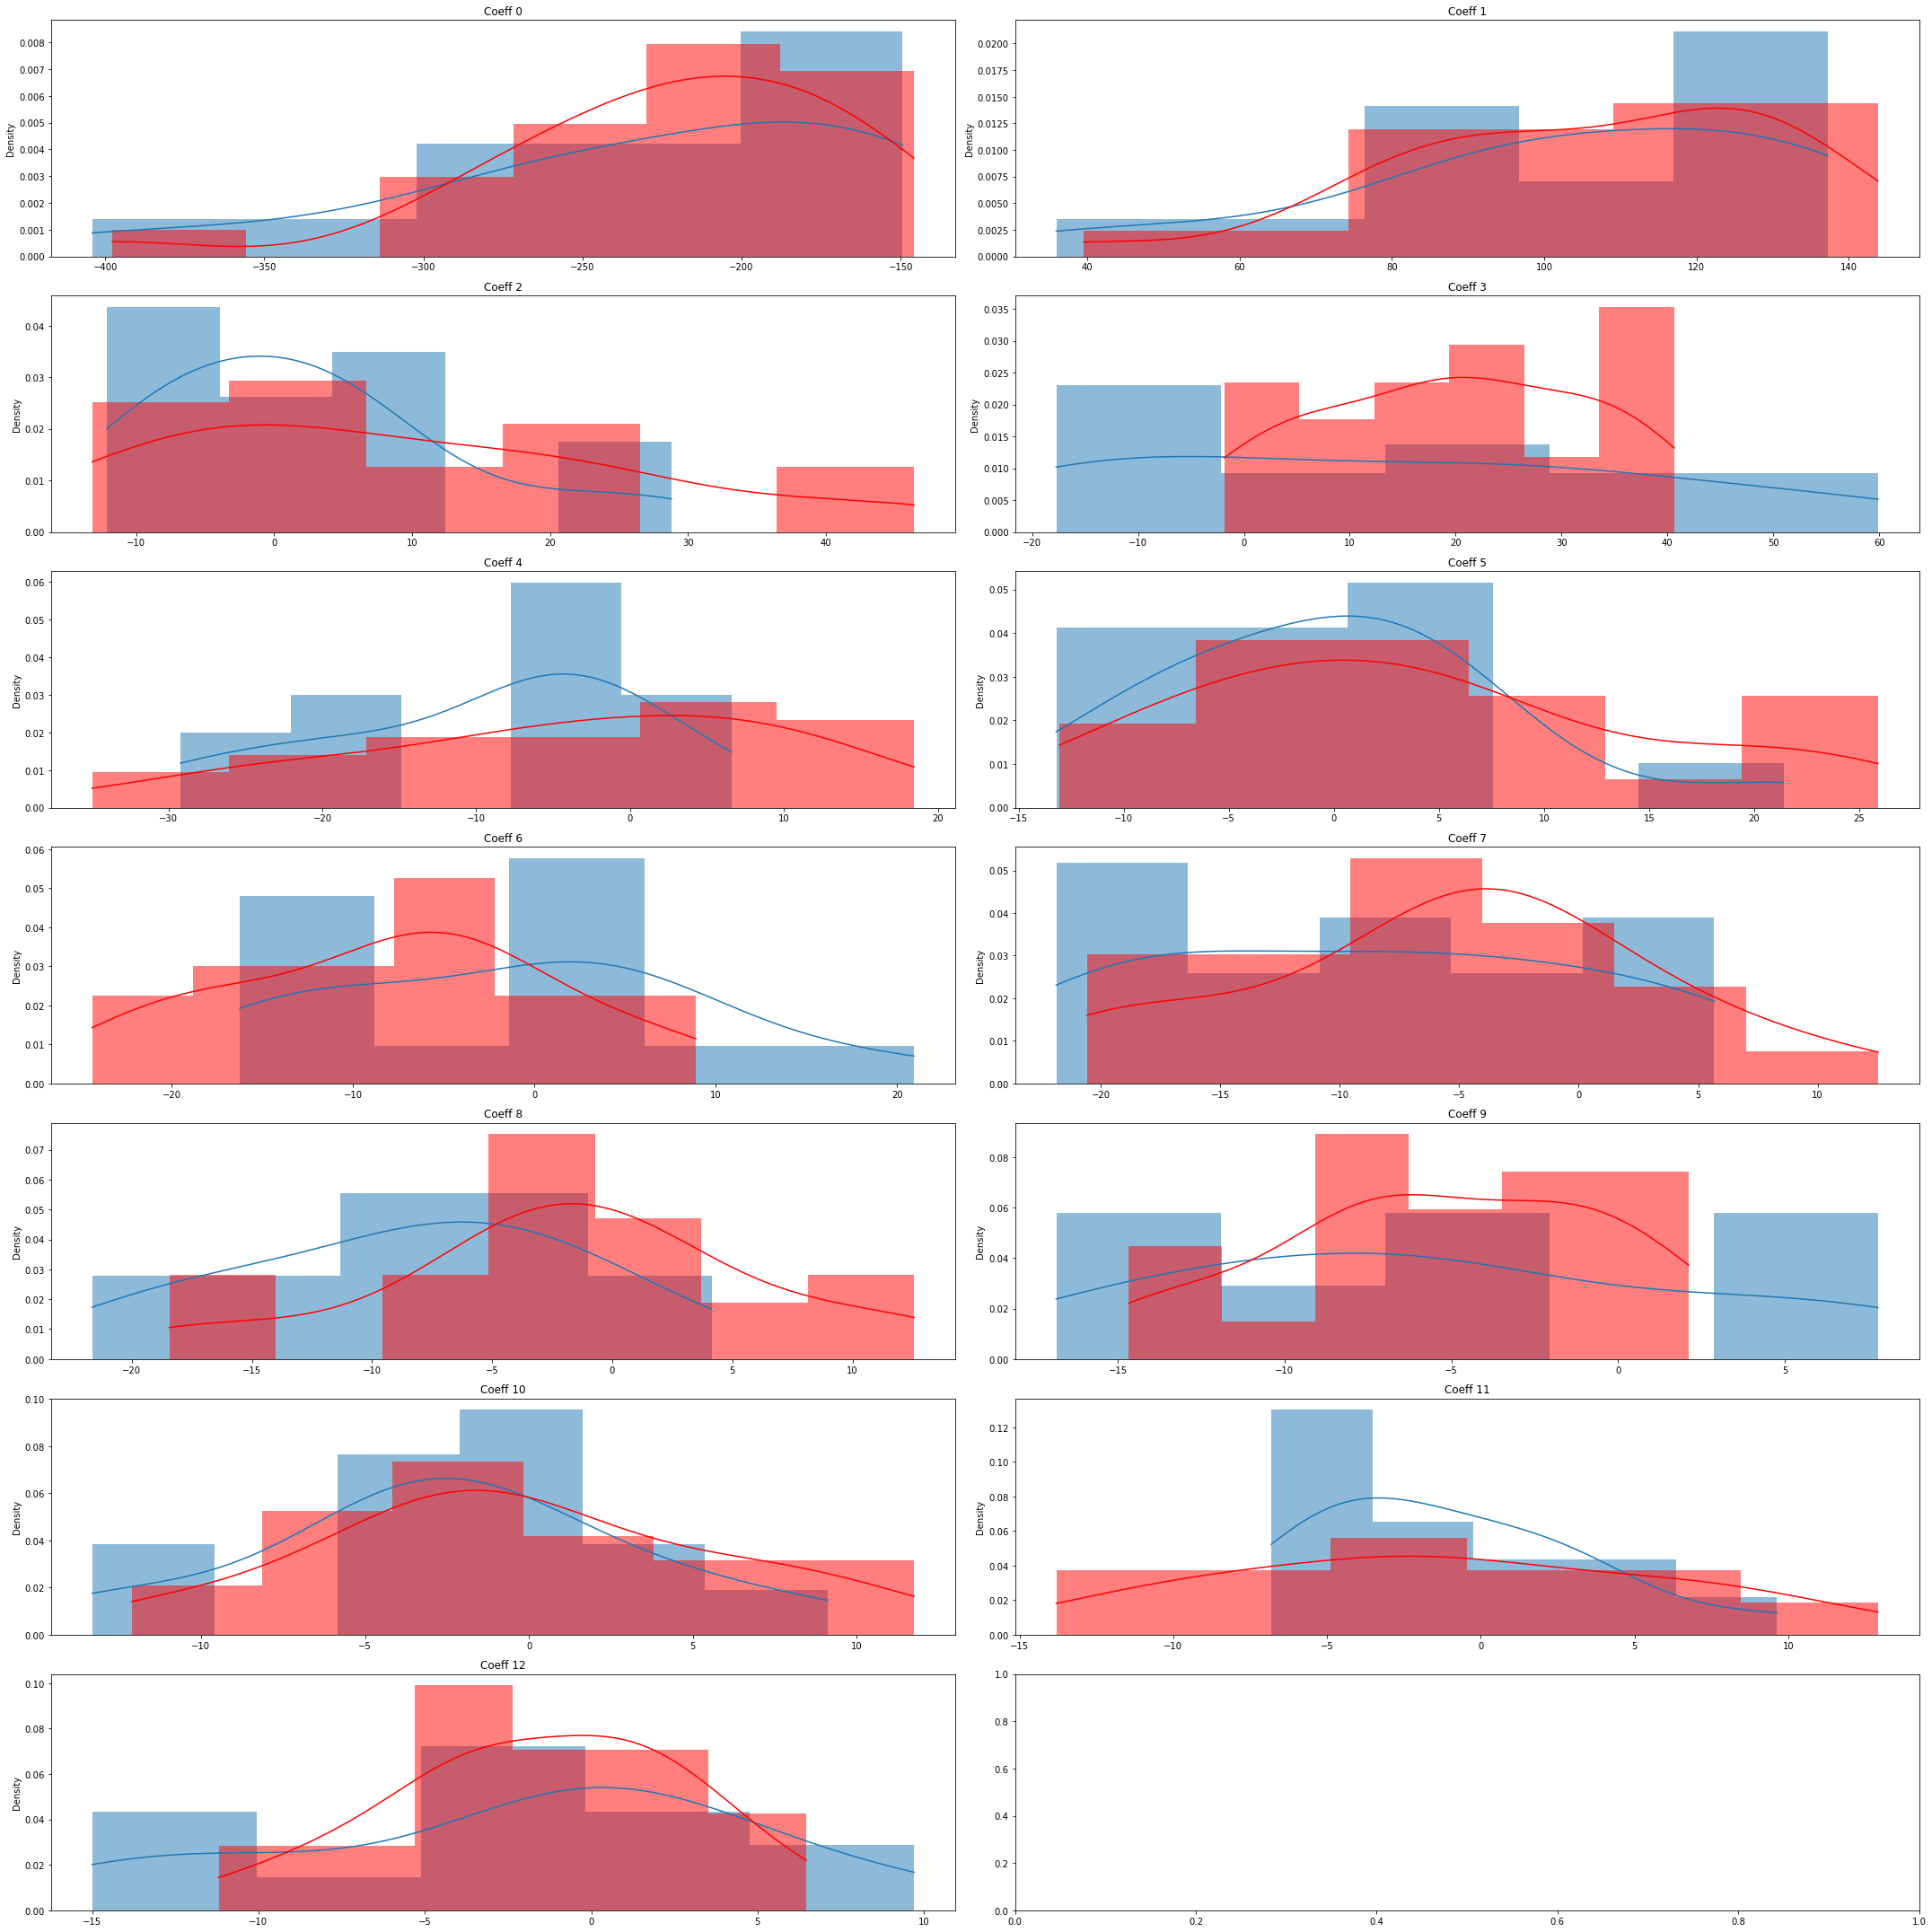

In [15]:
# This following code plots a bar chart for the mean spectrum of each of the 13 MFCCs across all the 'l' phoneme files 
# from dementia elderlies (coloured red).
# And compares them against the bar charts for the mean spectrum of each of the 13 MFCCs across all the 'l' phoneme files 
# from healthy elderlies (coloured blue).

os.chdir(r'C:\Users\Yixiu\OneDrive - Singapore University of Technology and Design\UROP\UROP Python audio classification\l')

mean_mfcc_list_dementia = np.array([track.mean(axis=1) for track in mfcc_dementia_l_list]) # We get the average energy of the coeffs in each file
fig,axes = plt.subplots(7,2,figsize=(30,30))

print(mean_mfcc_list_dementia)



for i in range(mean_mfcc_list_dementia.shape[1]):
    sns.histplot(mean_mfcc_list_healthy.T[i],ax=axes.ravel()[i], kde=True, stat="density", linewidth=0)
    sns.histplot(mean_mfcc_list_dementia.T[i],ax=axes.ravel()[i], kde=True, stat="density", linewidth=0, color= 'red')
    axes.ravel()[i].set_title("Coeff "+str(i))
    plt.tight_layout()
    plt.prism
    plt.savefig(f'mean_mfcc_dementia_and_healthy_l_consonant_{i}.png')